# Visualize the predictions

In [1]:
# importing the libraries
import torch
from torch import nn

import pandas as pd
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
# create the dataset
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [3]:
# create a pandas dataframe with the data
df = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "labels": y
})

df.head()


,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


<Axes: xlabel='X1', ylabel='X2'>

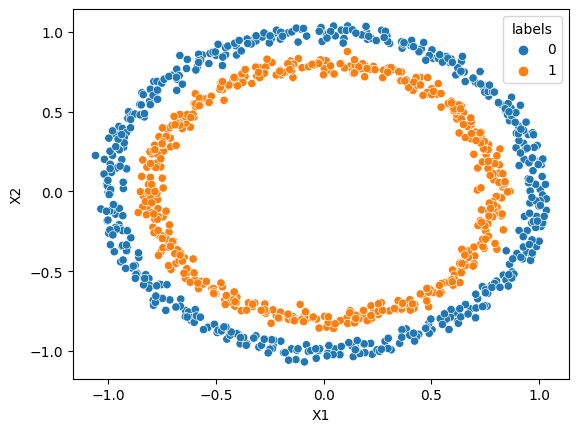

In [4]:
# visualize the data
sns.scatterplot(data=df, x="X1", y="X2", hue="labels")

In [5]:
# transform the data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [6]:
X.dtype

torch.float32

In [7]:
# split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# create a model
class CircleModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.two_linear_layer = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )

    def forward(self, x):
        return self.two_linear_layer(x)

In [9]:
model_0 = CircleModel()

In [10]:
model_0

CircleModel(
  (two_linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [11]:
# select a loss function and an optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [21]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [12]:
# create predictions with the untrained model
with torch.inference_mode():
    untrained_preds = model_0(X_test)

In [22]:
# train the model
epochs = 100

for epoch in range(epochs):
    model_0.train()

    # forward pass
    train_logits = model_0(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))

    # calculate the loss
    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_preds)

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    train_loss.backward()

    # optimizer step
    optimizer.step()

    # model evaluation
    model_0.eval()

    with torch.inference_mode():
        # forward pass
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f} | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}')

Epoch: 0 | Train loss: 0.69302 | Train accuracy: 50.62 | Test loss: 0.69449 | Test accuracy: 47.50
Epoch: 10 | Train loss: 0.69302 | Train accuracy: 50.38 | Test loss: 0.69450 | Test accuracy: 48.00
Epoch: 20 | Train loss: 0.69301 | Train accuracy: 50.75 | Test loss: 0.69451 | Test accuracy: 48.00
Epoch: 30 | Train loss: 0.69301 | Train accuracy: 50.88 | Test loss: 0.69452 | Test accuracy: 47.00
Epoch: 40 | Train loss: 0.69301 | Train accuracy: 51.12 | Test loss: 0.69453 | Test accuracy: 47.00
Epoch: 50 | Train loss: 0.69300 | Train accuracy: 51.25 | Test loss: 0.69454 | Test accuracy: 47.00
Epoch: 60 | Train loss: 0.69300 | Train accuracy: 51.12 | Test loss: 0.69455 | Test accuracy: 47.00
Epoch: 70 | Train loss: 0.69300 | Train accuracy: 51.00 | Test loss: 0.69456 | Test accuracy: 47.00
Epoch: 80 | Train loss: 0.69299 | Train accuracy: 51.12 | Test loss: 0.69457 | Test accuracy: 46.50
Epoch: 90 | Train loss: 0.69299 | Train accuracy: 50.75 | Test loss: 0.69457 | Test accuracy: 46.00


După cum spuneam, chiar și după antrenare, rezultatele nu se îmbunătățesc. Pentru a înțelege mai bine o să avem nevoie să vizualizăm partea de predicții. Ca să facem asta o să ne folosim de un script de python de unde putem să importăm metoda prin care să vizualizăm acest set de predicții. Metoda respectivă se găsește în cadrul fișierului `helper_functions.py` și poartă denumirea de `plot_decision_boundary`

In [23]:
from helper_functions import plot_decision_boundary

In [24]:
help(plot_decision_boundary)

Help on function plot_decision_boundary in module helper_functions:

plot_decision_boundary(model: torch.nn.modules.module.Module, X: torch.Tensor, y: torch.Tensor)
    Plots decision boundaries of model predicting on X in comparison to y.
    
    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)



Metoda respectivă ia ca și argument un model și feature-uri și label-uri

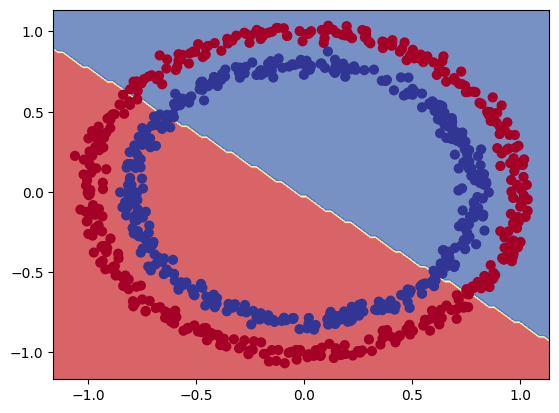

In [25]:
plot_decision_boundary(model_0, X_train ,y_train)

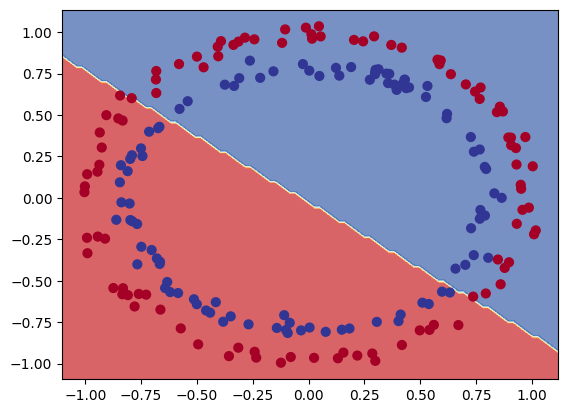

In [26]:
plot_decision_boundary(model_0, X_test ,y_test)

Prin vizualizarea respectivă putem să vedem de ce anume avem acea acuratețe de doar 50% pentru modelul respectiv. Modelul încearcă să separe datele respective, date care sunt prezente sub formă de cerc printr-o linie dreaptă. Acesta încearcă să facă acest lucru deoarece am utilizat în crearea modelului respectiv două layere liniare, prin urmare ca și rezulta o să fie o linie care încearcă să separe aceste două clase. În lecția viitoare o să vedem care ar fi variantele pe care le avem la dispoziție pentru a încerca să îmbunătățim acest model (dacă se poate)